# Flappy Bird Project: Compare Various RL Algorithms


## Course: Summer 2018, Deep Reinforcement Learning

**Professor: Dr. James Shanahan**

**TA: Christopher Dailey**

**Students: Gelesh Omathil, Naveen Kaul, Murali Cheruvu**



# Project Details: 

## Goal:
Produce a Table of RL-based approaches - Tabular and Value Approximations, where each row is an approach and each column is a dimension that differentiates the approaches such as model free, which of the quintuple each uses (State, Action, Transitions,  Rewards, etc..), and other dimensions.

## Flappy Bird Game:
Flappybird is a side-scrolling game where the agent must successfully navigate through gaps between pipes. The up arrow causes the bird to accelerate upwards. If the bird makes contact with the ground or pipes, or goes above the top of the screen, the game is over. For each pipe it passes through it gains a positive reward. Each time a terminal state is reached it receives a negative reward.

Determine a good policy for Flappy Birds using  any one or more of the following algorithms (aim to get 140 points or more!):
* Tabular - Q-Learning, Value Approximators: Linear Regression, Simple Q-Learning and Deep Q-Learning Networks

You may have to discretize the  space of  following parameters.
* Vertical distance from lower pipe
* Horizontal distance from next pair of pipes
* Life: Dead or Living
### Actions
For each state, there two possible actions
* Up
* Down
### Rewards
The reward structure is purely based on the "Life" parameter. One possible such structure could be the following (feel free to explore more):
* **+1** if Flappy Bird is still alive
* **-1000** if Flappy Bird is dead

## Flappy Birds Simulator:
Please use the openai gym environment for this project:

* https://gym.openai.com/envs/FlappyBird-v0/


## Submission

Please submit a report notebook and the python code-base for the algorithms.



# Reinforcement Algorithms

## List of Algorithms

We have implemented the following algorithms to train and play the flappy bird game:

* Tabular: Q-Learning
* Value Approximator: Linear Regression
* Value Approximator: Simple Q-Learning Network
* Value Approximator: Deep Q-Learning Network

**Note: Please refer to each of the above Jupyter Notebooks for the algorithm concepts, details and implementation**

## Technologies Used:

* Python - Keras, TensorFlow and standard libraries
* PyGame and Open AI Gym for Game Environment
* Open AI Gym complaint Flappy Bird Environment
* GPU enabled Cloud to run the Deep Q-Learning Network algorithm (using Microsoft Azure Windows Platform)


# Algorithms: Metrics and Comparison

In [234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

from matplotlib.cbook import MatplotlibDeprecationWarning
import matplotlib.colors as mcolors
import matplotlib.patches as patches
import matplotlib as mpl
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [235]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [237]:
import json

df = pd.DataFrame(columns=["algorithm", "duration", "episode", "score"])
stats = pd.DataFrame(columns=["Algorithm", "Total Duration", "Total Episodes", "Max Score"])

def load_json_data(file_name, df):
    with open(file_name, 'r') as f:
          json_data = json.load(f)
    f.close()
    
    for item in json_data:
        duration =  int(item["duration"].split(':')[0]) * 60 + int(item["duration"].split(':')[1])
        df.loc[len(df)]  = [item["algorithm"], duration, item["episode"], item["score"]]    
        
def update_stats(df, stats, algorithm):    
    df_filtered = df.query("algorithm == '{}'".format(algorithm))    
    stats.loc[len(stats)] = [
                                df_filtered.iloc[0]["algorithm"],
                                df_filtered["duration"].max(),
                                df_filtered["episode"].max(),                               
                                df_filtered["score"].max()                            
                            ]
    
                
load_json_data("data/stats_flappy_bird_tabular_q_learning.json", df)
load_json_data("data/stats_flappy_bird_linear.json", df)
load_json_data("data/stats_flappy_bird_Simple_Neural_Network.json", df)
#load_json_data("data/stats_flappy_bird_Deep_Neural_Network.json", df)

In [238]:
update_stats(df, stats, 'tabular_q_learning')
update_stats(df, stats, 'Simple_Neural_Network')
update_stats(df, stats, 'linear')
#update_stats(df, stats, 'deep_Neural_Network')

In [239]:
stats

,Algorithm,Total Duration,Total Episodes,Max Score
0,tabular_q_learning,243,160,1141
1,Simple_Neural_Network,162,9999,120
2,linear,32,1000,35


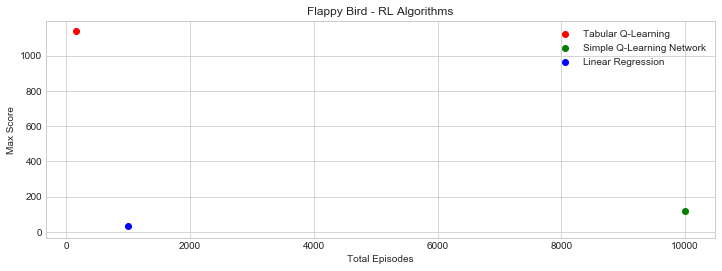

In [240]:
plt.title("Flappy Bird - RL Algorithms")
plt.xlabel('Total Episodes')
plt.ylabel('Max Score')    
plt.xlabel('Total Episodes')
plt.ylabel('Max Score')    
plt.scatter(stats.iloc[0]["Total Episodes"], stats.iloc[0]["Max Score"],color='r',label='Tabular Q-Learning')
plt.scatter(stats.iloc[1]["Total Episodes"], stats.iloc[1]["Max Score"],color='g',label='Simple Q-Learning Network')
plt.scatter(stats.iloc[2]["Total Episodes"], stats.iloc[2]["Max Score"],color='b',label='Linear Regression')
#plt.scatter(stats.iloc[3]["Total Episodes"], stats.iloc[3]["Max Score"],color='m',label='Deep Q-Learning Network')
plt.legend(loc="best") 
plt.show()

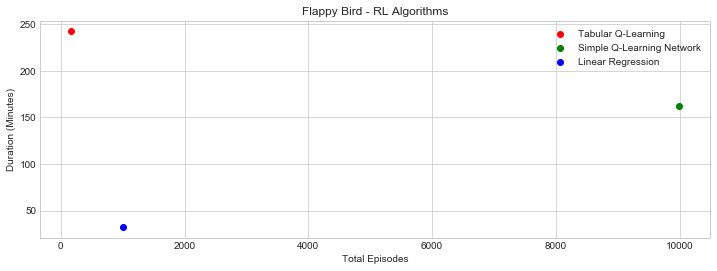

In [241]:
plt.title("Flappy Bird - RL Algorithms")
plt.xlabel('Total Episodes')
plt.ylabel('Duration (Minutes)')    
plt.scatter(stats.iloc[0]["Total Episodes"], stats.iloc[0]["Total Duration"],color='r',label='Tabular Q-Learning')
plt.scatter(stats.iloc[1]["Total Episodes"], stats.iloc[1]["Total Duration"],color='g',label='Simple Q-Learning Network')
plt.scatter(stats.iloc[2]["Total Episodes"], stats.iloc[2]["Total Duration"],color='b',label='Linear Regression')
#plt.scatter(stats.iloc[3]["Total Episodes"], stats.iloc[3]["Total Duration"],color='m',label='Deep Q-Learning Network')
plt.legend(loc="best") 
plt.show()

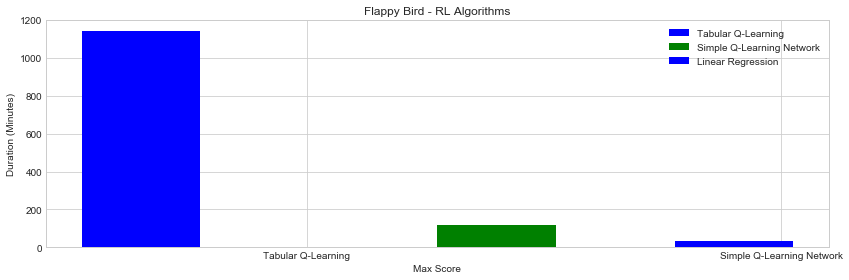

In [242]:
#plt.figure(figsize=(1,1))
plt.title("Flappy Bird - RL Algorithms")
plt.xlabel('Max Score')
plt.ylabel('Duration (Minutes)') 
bar_width = 0.35
x_pos = np.arange(2)
plt.bar(0,stats.iloc[0]["Max Score"],color=['b'],label='Tabular Q-Learning', width=0.25)
plt.bar(0.75,stats.iloc[1]["Max Score"],color=['g'],label='Simple Q-Learning Network',width=0.25)
plt.bar(1.25,stats.iloc[2]["Max Score"],color=['b'],label='Linear Regression',width=0.25)
#plt.bar(2.25,stats.iloc[3]["Max Score"],color=['m'],label='Deep Q-Learning Network',width=0.25)
plt.xticks(x_pos + bar_width,['Tabular Q-Learning', 'Simple Q-Learning Network', 'Linear Regression'])
#plt.xticks(x_pos + bar_width,['Tabular Q-Learning', 
                             #   'Simple Q-Learning Network', 
                             #   'Linear Regression', 
                             #   'Deep Q-Learning Network'])
plt.legend(loc="best") 
plt.tight_layout()
plt.show()

In [243]:
def plot_episode_and_score(algorithm, df):
    df_filtered = df.query("algorithm == '{}'".format(algorithm))
    plt.title("Flappy Bird - {}".format(algorithm))
    plt.xlabel('Episodes')
    plt.ylabel('Score')    
    plt.plot(df_filtered["episode"], df_filtered["score"])    
    plt.show()

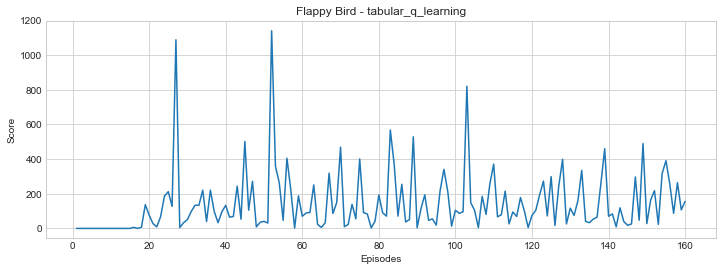

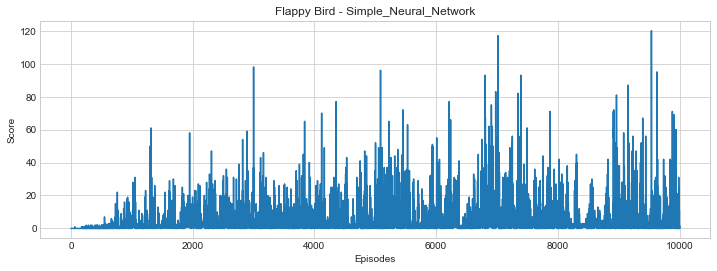

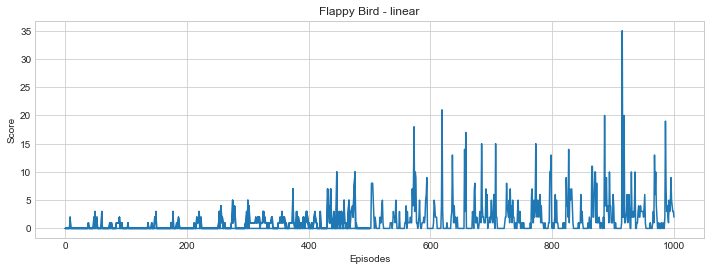

In [244]:
plot_episode_and_score("tabular_q_learning", df)
plot_episode_and_score("Simple_Neural_Network", df)
plot_episode_and_score("linear", df)
#plot_episode_and_score("Deep_Neural_Network", df)

# References: 

**We would like thank our professor: Dr. Shanahan and TA, Chris Dailey for their great guidance and continual help and support during the Deep Reinforcement Learning course.**

**We would also like to thank various developers and authors of the Reinforcement Learning related including the references given in the following links.**

https://medium.com/@videshsuman/using-reinforcement-learning-techniques-to-build-an-ai-bot-for-the-game-flappy-bird-30e0fd22f990


https://hardikbansal.github.io/FlappyDQNBlog/
https://github.com/chncyhn/flappybird-qlearning-bot

https://github.com/yenchenlin/DeepLearningFlappyBird

https://github.com/aronszanto/Flappy-Bird-Learning/blob/master/FB%20White%20Paper.pdf

https://github.com/rabbitnoname/rlsimple/blob/master/DQN/deep_q_network.py

https://github.com/floodsung/Gym-Flappy-Bird/blob/master/gym_flappy_bird/envs/flappy_bird_env.py

https://github.com/SupaeroDataScience/RLchallenge/blob/master/RandomBird/FlappyAgent.py

https://github.com/ntasfi/PyGame-Learning-Environment/blob/master/docs/user/home.rst

https://nthu-datalab.github.io/ml/labs/16-1_Q-Learning/16-1_Q_Learning.html

http://karpathy.github.io/2016/05/31/rl/

https://medium.com/emergent-future/simple-reinforcement-learning-with-tensorflow-part-0-q-learning-with-tables-and-neural-networks-d195264329d0

https://github.com/mebusy/notes/blob/master/dev_notes/RL_DavidSilver.md

https://github.com/fiezt/Reinforcement-Learning/blob/master/code/OpenAIGymExamples.ipynb

https://github.com/mpatacchiola/dissecting-reinforcement-learning/blob/master/src/6/multi-armed-bandit/epsilon_greedy_agent_bandit.py

https://dunglai.github.io/2017/09/21/FlappyBirdAI/

https://blog.openai.com/evolution-strategies/

http://blog.aylien.com/flappy-bird-and-evolution-strategies-an-experiment/

https://yanpanlau.github.io/2016/07/10/FlappyBird-Keras.html

https://dunglai.github.io/2017/10/10/linear-regression/


https://github.com/dalmia/David-Silver-Reinforcement-learning/blob/master/Week%206%20-%20Value%20Function%20Approximations/Q-Learning%20with%20Value%20Function%20Approximation.ipynb

https://github.com/floodsung/Gym-Flappy-Bird/blob/master/gym_flappy_bird/envs/flappy_bird_env.py

https://github.com/jmathison/gym-simpleflappy


https://tonypoer.io/2016/12/15/making-an-ai-to-play-flappy-bird-w-q-learning/

https://medium.com/@jamsawamsa/running-a-google-cloud-gpu-for-fast-ai-for-free-5f89c707bae6

https://github.com/ssusnic/Machine-Learning-Flappy-Bird

http://burlap.cs.brown.edu/tutorials_v2/scd/p1.html

https://github.com/keon/deep-q-learning/blob/master/dqn.py

https://towardsdatascience.com/reinforcement-learning-w-keras-openai-dqns-1eed3a5338c

https://github.com/yenchenlin/DeepLearningFlappyBird

https://medium.com/@gtnjuvin/my-journey-into-deep-q-learning-with-keras-and-gym-3e779cc12762
